In [152]:
from vizdoom import *
import random
import time
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [81]:
game = DoomGame()
game.load_config('github_vd/VizDoom/scenarios/basic.cfg')
game.init()

In [53]:
actions = np.identity(3, dtype = np.uint8)

In [46]:
random.choice(actions)

array([0, 0, 1], dtype=uint8)

In [47]:
state = game.get_state()

In [64]:
state.screen_buffer.shape

(3, 240, 320)

In [ ]:
episodes = 10
for episode in range(episodes):
    game.new_episode()
    while not game.is_episode_finished():
        state = game.get_state()
        img = state.screen_buffer
        info = state.game_variables
        reward = game.make_action(random.choice(actions),4)
        print('reward:',reward)
        time.sleep(0.02)
    print('Result:', game.get_total_reward())
    time.sleep(2)
        

In [55]:
game.close()

In [57]:
from gym import  Env
from gym.spaces import Discrete,Box
import cv2

In [187]:
class VizDoomGym(Env):
    # Function to start the env
    def __init__(self, render = False):
        
        super().__init__()
        self.game = DoomGame()
        self.game.load_config('github_vd/VizDoom/scenarios/basic.cfg')
        
        if render == False:
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
            
        self.game.init()
        
        self.observation_space = Box(low= 0, high = 255, shape = [100,160,1], dtype = np.uint8)
        self.action_space = Discrete(3)
        
    def step(self,action):
        actions = np.identity(3, dtype = np.uint8)
        reward = self.game.make_action(actions[action],4)
        
        if self.game.get_state():
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            info = self.game.get_state().game_variables
        else:
            
            state = np.zeros(self.observation_space.shape)
            info = 0
        
        done = self.game.is_episode_finished()
        
        return state,reward,done,info
    
    def render():
        pass
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation,0,-1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray,(160,100), interpolation = cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
        
    def reset(self):
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    def close(self):
        self.game.close()


In [188]:
env = VizDoomGym(render = True)

In [205]:
state = env.step(2)

In [203]:
state = env.reset()

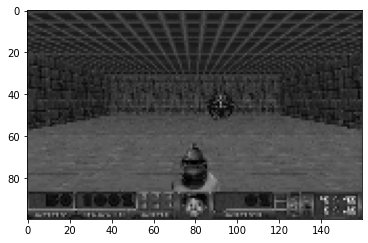

In [185]:
plt.imshow(cv2.cvtColor(state,cv2.COLOR_BGR2RGB))

In [206]:
env.close()